## __Scaling__

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Transform numerical data into same range (typically small). Some method may work best with scaling
ex. KNN, Neural Network, Linear Model
<br>
Scaling:
- MinMax Scaler
- Standard Scaler
- Robust Scaler

In [2]:
tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


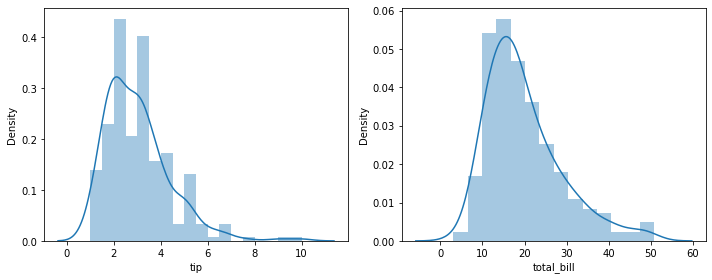

In [3]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(tips['tip'])
plt.subplot(1,2,2)
sns.distplot(tips['total_bill'])
plt.tight_layout()
plt.show()

In [4]:
tips[['tip', 'total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


from illustration above, you can see the range and descriptive statistics of each variables, tips and total bill. we will transform these variables into smaller range using:
- min max scaler
- standard scaler
- robust scaler

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [6]:
X = tips[['tip', 'total_bill']]

In [7]:
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

> ## MinMax

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}

In [8]:
X_minmax = minmax.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [9]:
X_minmax.describe()

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


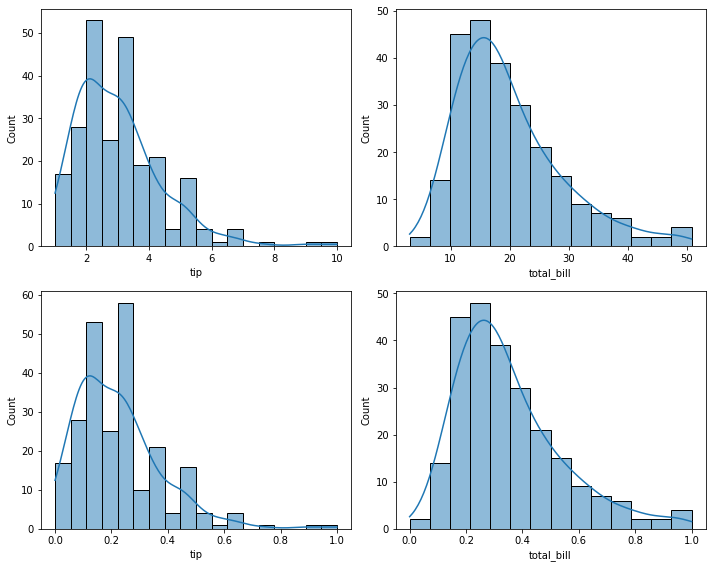

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(2,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(2,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(2,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.tight_layout()
plt.show()

from illustration above, you can see that min max scaler method has transformed each varables into range 0 to 1.

> ## StandardScaler


\begin{align}
z_i = \frac{x_i - \bar{x}}{s}
\end{align}


In [11]:
X_standard = standard.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=X.columns)
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [12]:
X_standard.describe()

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.846297e-16,-6.597637e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


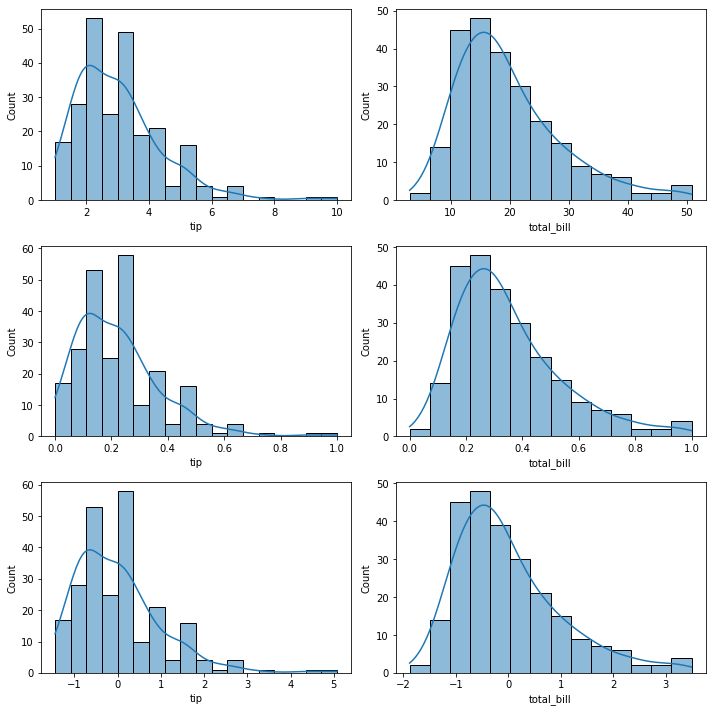

In [13]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(3,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(3,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(3,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.subplot(3,2,5)
sns.histplot(X_standard['tip'], kde=True)
plt.subplot(3,2,6)
sns.histplot(X_standard['total_bill'], kde=True)

plt.tight_layout()
plt.show()

> ## RobustScaler

\begin{align}
z_i = \frac{x_i - Q_1(x_i)}{Q_3(x_i) - Q_1(x_i)}
\end{align}
​
​


In [14]:
X_robust = robust.fit_transform(X)
X_robust = pd.DataFrame(X_robust, columns=X.columns)
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [15]:
X_robust.describe()

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


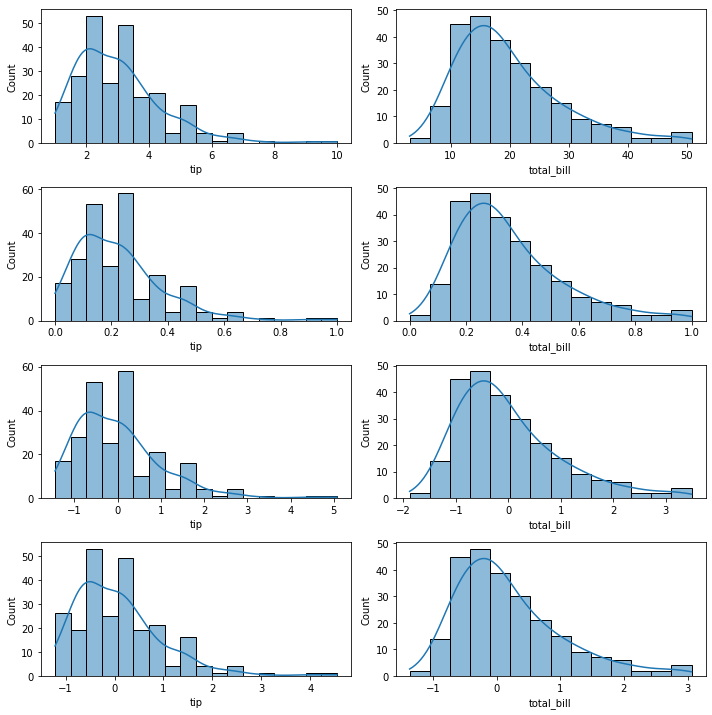

In [16]:
plt.figure(figsize=(10,10))

plt.subplot(4,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(4,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(4,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(4,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.subplot(4,2,5)
sns.histplot(X_standard['tip'], kde=True)
plt.subplot(4,2,6)
sns.histplot(X_standard['total_bill'], kde=True)

plt.subplot(4,2,7)
sns.histplot(X_robust['tip'], kde=True)
plt.subplot(4,2,8)
sns.histplot(X_robust['total_bill'], kde=True)

plt.tight_layout()
plt.show()

## __Encoding__

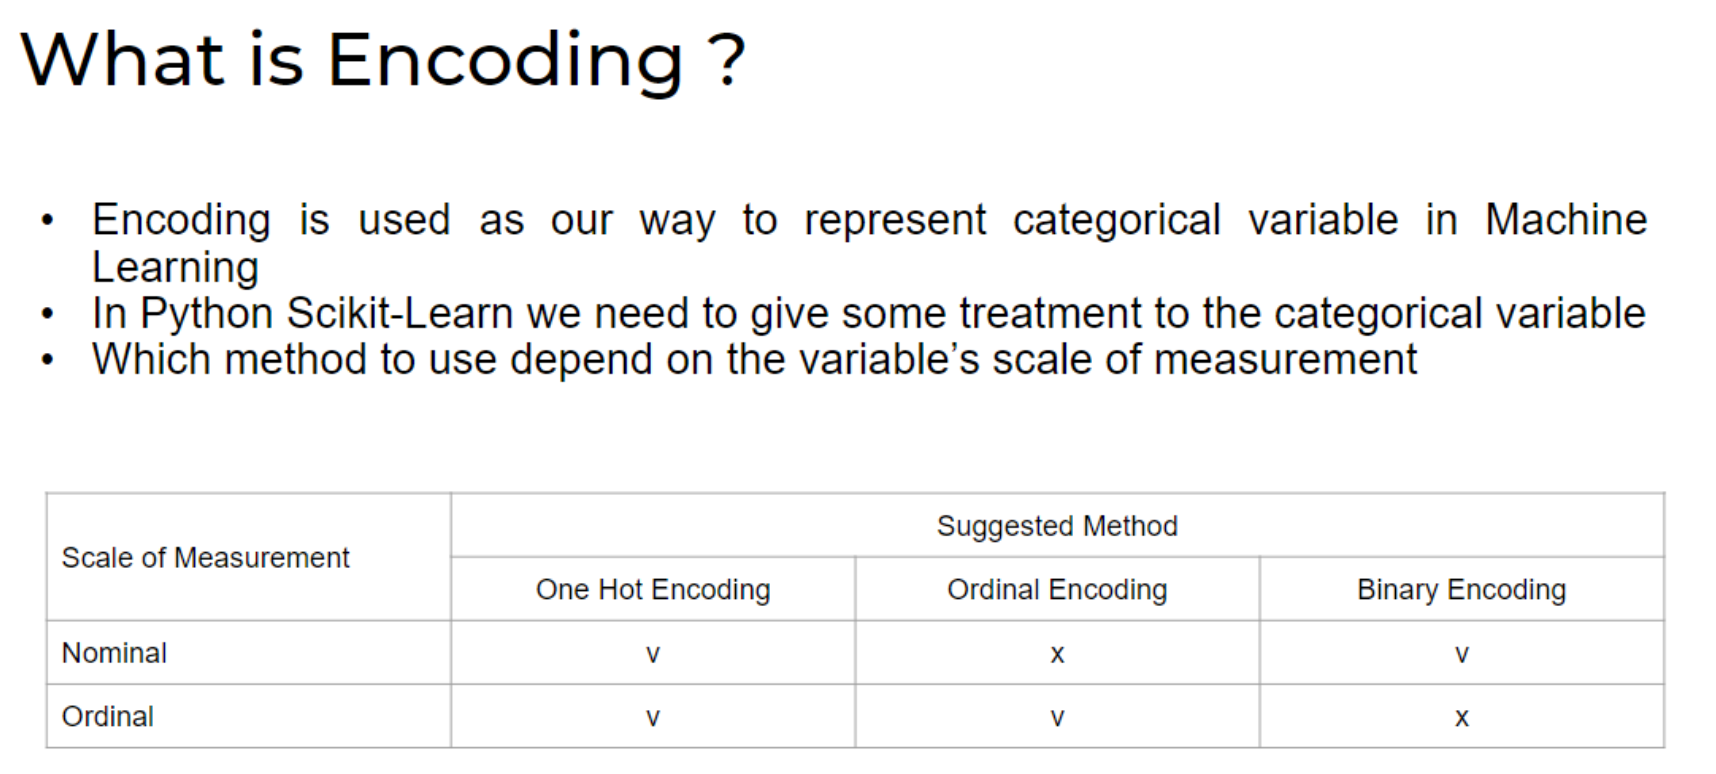

> ## Pandas: Get Dummy

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
for i in 'sex smoker day time'.split():
    print(tips[i].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


these are the variables that we will transform into dummy variables. Sex two categories, smoker two categories, day four categories and time two categories. For each categories we will make one dummy variable.

In [19]:
tips_dummy = pd.get_dummies(tips, columns='sex smoker day time'.split())
tips_dummy.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


You can clearly see that each variables now has dummy variables as many as the number of category.

> ## One Hot Encoding

One Hot Encoding also can be implemented using sklearn library. we use OneHotEncoder and ColumnTransformer classes. OneHotEncoder for the one hot encoding method and ColumnTransformer to select which variable to transform.

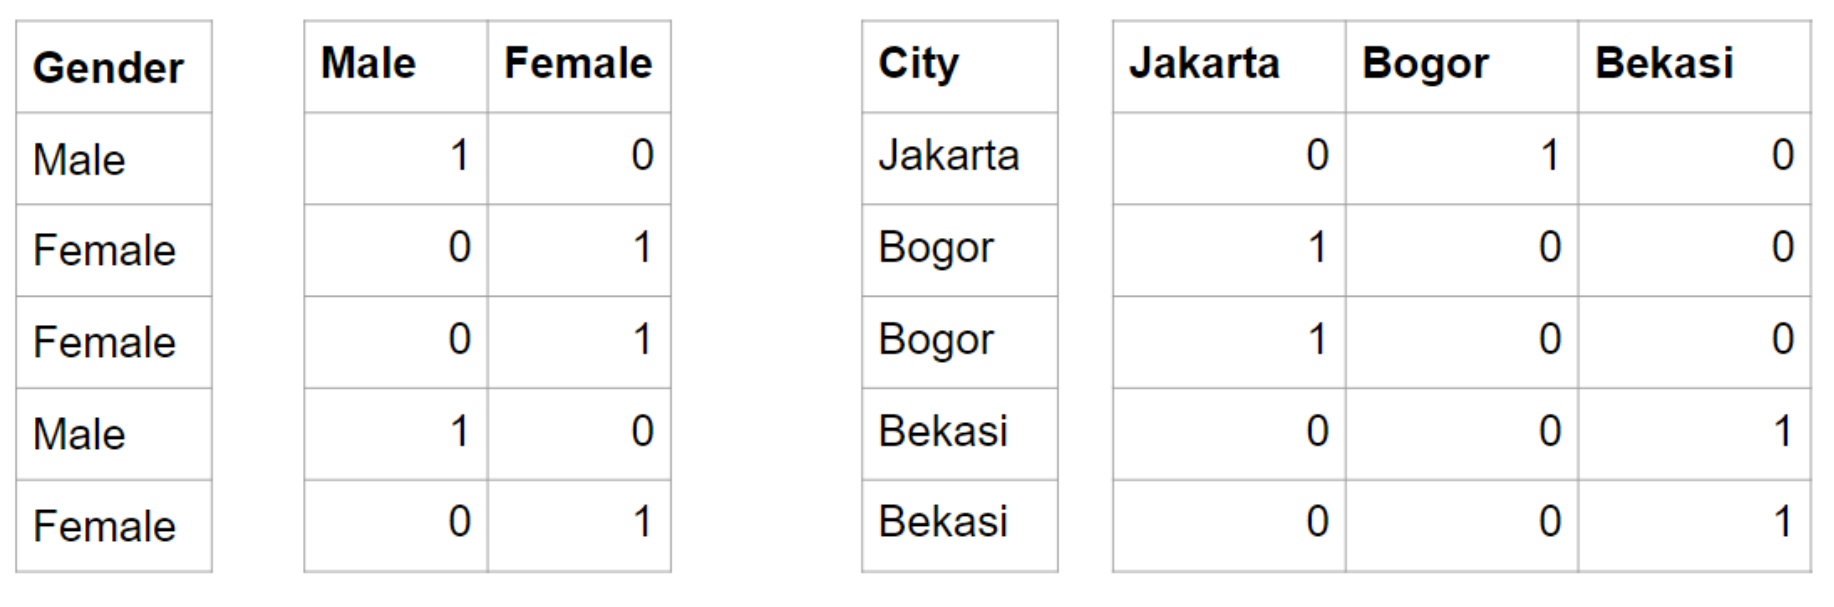

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
OneHotEncoder().get_params()

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'sparse': True}

In [22]:
transformer = ColumnTransformer([
                                ('encoder', OneHotEncoder(), 'sex smoker day time'.split())
])
# 2 + 2 + 4 + 2 = 10

In [23]:
tips_encoded = pd.DataFrame(transformer.fit_transform(tips))
tips_encoded

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Using this method you don't automatically rename the variables. You must get the name of the feature separately. But, in the later course you will find out that preprocessing method from skelarn can make your whole process of the modeling easier for: cross validation and hyperparameter tuning.

In [24]:
transformer.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_No',
 'encoder__x1_Yes',
 'encoder__x2_Fri',
 'encoder__x2_Sat',
 'encoder__x2_Sun',
 'encoder__x2_Thur',
 'encoder__x3_Dinner',
 'encoder__x3_Lunch']

In [25]:
tips_encoded.columns = transformer.get_feature_names()
tips_encoded = pd.concat([tips['total_bill tip size'.split()], tips_encoded], axis=1)
tips_encoded

,total_bill,tip,size,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


> ## Ordinal Encoding .map

We illustrate implementation of Ordinal encoding using .map and category_encoder library. This library can be integrated with scikit learn library and can be used in modeling process aswell.

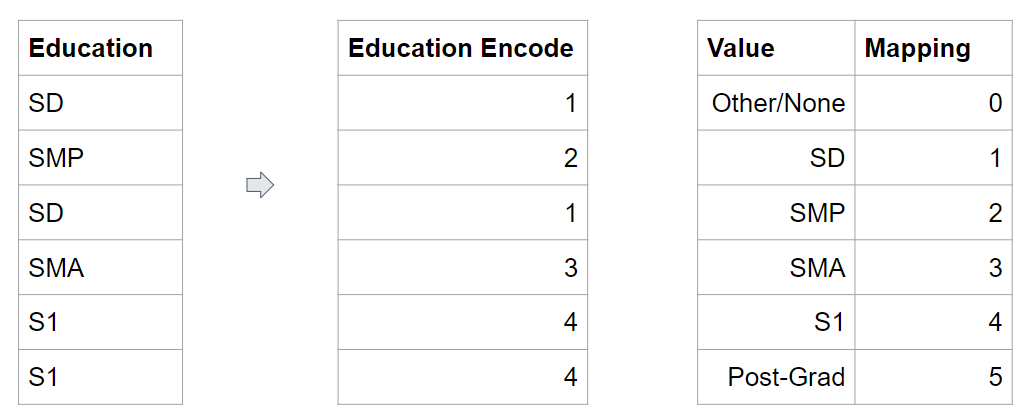

In [26]:
import category_encoders as ce

In [27]:
tips_ordinal_encoded = tips.copy()

In [28]:
tips_ordinal_encoded.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [29]:
tips_ordinal_encoded['day'] = tips_ordinal_encoded['day'].map({'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4})

In [30]:
tips_ordinal_encoded.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4


In [31]:
tips_ordinal_encoded.day.value_counts()

3    87
4    76
1    62
2    19
Name: day, dtype: int64

> ## ce.OrdinalEncoder

In [32]:
ordinal_mapping=[
    {'col': 'day',
     'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun':4}}
]

ordinal_encoder = ce.OrdinalEncoder(cols = 'day', mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day'])
dford

,day
0,4
1,4
2,4
3,4
4,4
...,...
239,3
240,3
241,3
242,3


In [33]:
tips_ordinal_encoded = pd.concat([tips, dford], axis=1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size,day
0,16.99,1.01,Female,No,Sun,Dinner,2,4
1,10.34,1.66,Male,No,Sun,Dinner,3,4
2,21.01,3.50,Male,No,Sun,Dinner,3,4
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,4
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3
242,17.82,1.75,Male,No,Sat,Dinner,2,3


In [34]:
ordinal_mapping=[
    {'col': 'day',
     'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun':4}},
    {'col': 'time',
     'mapping': {None: 0, 'Lunch': 1, 'Dinner': 2}}
]

ordinal_encoder = ce.OrdinalEncoder(cols = 'day time'.split(), mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day time'.split()])
dford

,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2
...,...,...
239,3,2
240,3,2
241,3,2
242,3,2


In [35]:
tips_ordinal_encoded = pd.concat([tips, dford], axis=1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size,day,time
0,16.99,1.01,Female,No,Sun,Dinner,2,4,2
1,10.34,1.66,Male,No,Sun,Dinner,3,4,2
2,21.01,3.50,Male,No,Sun,Dinner,3,4,2
3,23.68,3.31,Male,No,Sun,Dinner,2,4,2
4,24.59,3.61,Female,No,Sun,Dinner,4,4,2
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3,2
242,17.82,1.75,Male,No,Sat,Dinner,2,3,2


> ## Binary Encoding

Binary encoding using category_encoder library. We will implement binary ecoding using the category_encoders library. We will implement binary encoding to day variable.

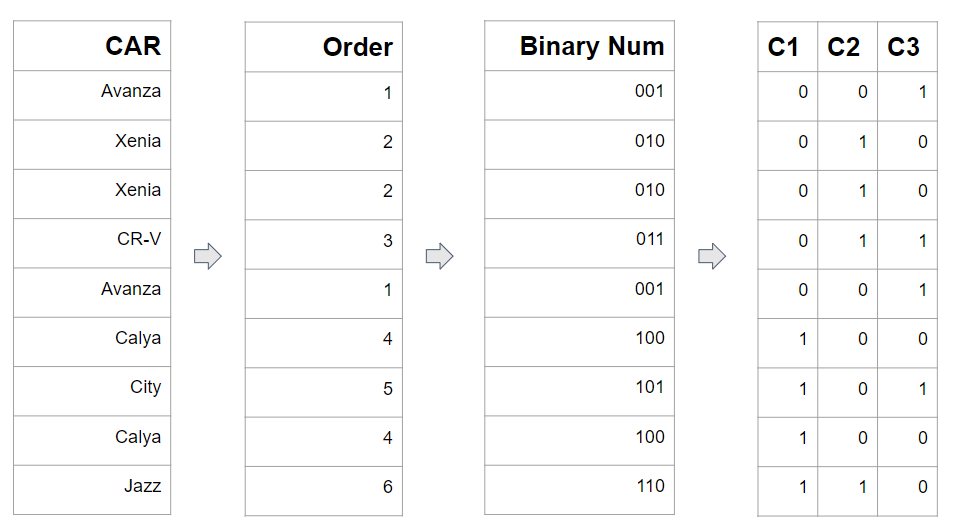

In [36]:
binary_encoder = ce.BinaryEncoder(cols = ['day'])
dfbin = binary_encoder.fit_transform(tips['day'])
dfbin

,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


In [37]:
tips_binary_encoded = pd.concat([tips, dfbin], axis=1)
tips_binary_encoded

,total_bill,tip,sex,smoker,day,time,size,day_0,day_1,day_2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0


In [38]:
tips_binary_encoded['day_0'].value_counts()

0    225
1     19
Name: day_0, dtype: int64

In [39]:
tips_binary_encoded['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [161]:
day = pd.Series('Fri Sat Sun Thur'.split(), name='day')
day_binary = binary_encoder.transform(day)
day_binary

,day_0,day_1,day_2
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,1


In [164]:
binary_encoder.inverse_transform(day_binary)

,day
0,Fri
1,Sat
2,Sun
3,Thur


# __Apply Several Preprocessing Method to Modeling at once Part 1a : Ridge__

> ## Table of Content
1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

In [41]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [42]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> ## Preprocessing

preprocess scheme:
1. one hot encoding : sex, smoker, time
1. binary encoding : day
1. robust scaler : total_bill
1. no treatment : size

In [43]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), 'sex smoker time'.split()),
    ('binary', ce.BinaryEncoder(), ['day']),
    ('robust', RobustScaler(), ['total_bill'])
], remainder = 'passthrough')

> ## Data Splitting

70(train) : 30(test)

In [44]:
X = tips.drop('tip', axis=1)
y = tips['tip']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

> ## Data Transform

Here, we will do preprocessing step. Like we discuss previously. we apply .fit only to training set and .transform for both training set and test set.

In [46]:
X_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [47]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [48]:
X_trp_df = pd.DataFrame(X_train_preprocessed)
X_tsp_df = pd.DataFrame(X_test_preprocessed)
X_trp_df

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


In [49]:
transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('binary', BinaryEncoder(), ['day']),
 ('robust', RobustScaler(), ['total_bill']),
 ('remainder', 'passthrough', [5])]

In [50]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [51]:
transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [52]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill scaled', 'size']
X_trp_df.columns = features
X_tsp_df.columns = features
X_trp_df

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


In [53]:
X_tsp_df

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,0.0,0.0,0.0,0.0,1.0,0.0,-0.117435,3.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.251129,2.0
2,1.0,1.0,0.0,0.0,0.0,1.0,-0.334237,2.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.070461,4.0
4,1.0,1.0,0.0,0.0,0.0,1.0,-0.225836,2.0
...,...,...,...,...,...,...,...,...
56,0.0,1.0,1.0,0.0,1.0,1.0,-0.430894,2.0
57,1.0,0.0,1.0,0.0,1.0,1.0,-0.903342,2.0
58,1.0,1.0,0.0,0.0,1.0,0.0,1.390244,2.0
59,0.0,1.0,1.0,1.0,0.0,0.0,-0.670280,2.0


Data Prep and Feature Engineering: 2 hari
Model Performance, Evaluation Method, Hyperparam Tuning: 2 hari
Imbalance Classification: 1 hari
Ensemble: 2 hari
Unsupervised
NLP
Recommender System
Model Deployment

> ## Model Fitting and evaluation

In [55]:
ridge = Ridge()
ridge.fit(X_trp_df, y_train)

Ridge()

In [58]:
y_pred = ridge.predict(X_tsp_df)
print('mse', mean_squared_error(y_test, y_pred))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred)))

mse 1.0577456219830774
rmse 1.0284676086212328


> ## Model Properties

In [59]:
coef_table = pd.DataFrame({'feature': X_trp_df.columns, 'coef': ridge.coef_})
coef_table

,feature,coef
0,x0_Male,-0.219943
1,x1_Yes,-0.071079
2,x2_Lunch,0.116938
3,day_0,0.031693
4,day_1,-0.002460
5,day_2,-0.061386
6,total_bill scaled,1.086144
7,size,0.172890


# Apply Several Preprocessing Method to Modeling at once Part 1b : Tree

> ## Table of Content


1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

In [60]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [61]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> ## Preprocessing

preprocess v1 scheme:
1. one hot encoding : sex, smoker, time
1. ordinal encoding : day
1. no treatment : size, total_bill

In [62]:
ordinal_mapping = [
    {'col': 'day',
    'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}},
]

ordinal_encoder = ce.OrdinalEncoder(cols='day', mapping=ordinal_mapping)

In [63]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
    ('ordinal', ordinal_encoder, ['day']),
], remainder = 'passthrough')

preprocess v2:
1. one hot encoding : sex, smoker
1. ordinal encoding : time, day
1. no treatment : size, total_bill

> ## Data Splitting

In [64]:
X = tips.drop('tip', axis=1)
y = tips['tip']
features = X.columns

In [65]:
Xtr, Xts, ytr, yts = train_test_split(X, y, random_state=10)

> ## Data Transform

In [66]:
Xtr.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


> ## fit-transform

In [67]:
Xtr_p = transformer.fit_transform(Xtr)
Xts_p = transformer.transform(Xts)

> ## Change from 2d array to DF

In [70]:
Xtr_p = pd.DataFrame(Xtr_p)
Xts_p = pd.DataFrame(Xts_p)

In [71]:
transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('ordinal',
  OrdinalEncoder(cols=['day'],
                 mapping=[{'col': 'day',
                           'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                       'Thur': 1}}]),
  ['day']),
 ('remainder', 'passthrough', [0, 5])]

In [79]:
Xtr.columns

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [74]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [78]:
transformer.transformers_[1][1].get_feature_names()

['day']

In [80]:
new_features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill', 'size']
new_features

['x0_Male', 'x1_Yes', 'x2_Lunch', 'day', 'total_bill', 'size']

In [81]:
features

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [83]:
Xtr_p.columns = new_features
Xts_p.columns = new_features

In [84]:
display(Xtr_p.head())
display(Xts_p.head())

,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,1.0,1.0,0.0,3.0,11.24,2.0
1,1.0,0.0,0.0,4.0,10.34,3.0
2,1.0,0.0,0.0,4.0,21.01,3.0
3,1.0,0.0,0.0,3.0,20.23,2.0
4,1.0,1.0,0.0,4.0,40.55,2.0


,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,0.0,0.0,0.0,4.0,16.21,3.0
1,1.0,1.0,0.0,3.0,20.29,2.0
2,1.0,1.0,0.0,3.0,13.81,2.0
3,1.0,1.0,0.0,3.0,18.29,4.0
4,1.0,1.0,0.0,3.0,15.01,2.0


In [86]:
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(Xtr_p, ytr)

DecisionTreeRegressor(max_depth=3)

In [91]:
y_pred = dtr.predict(Xts_p)
print('mse:', mean_squared_error(yts, y_pred))
print('rmse:', np.sqrt(mean_squared_error(yts, y_pred)))

mse: 0.8414314225960591
rmse: 0.9172957116415944


> ## Model Properties

In [93]:
importance_table = pd.DataFrame({
    'importance': dtr.feature_importances_
}, index=new_features)
importance_table

,importance
x0_Male,0.000000
x1_Yes,0.111308
x2_Lunch,0.000000
day,0.000000
total_bill,0.888692
size,0.000000


<AxesSubplot:>

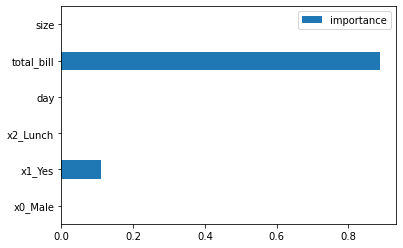

In [94]:
importance_table.plot(kind='barh')

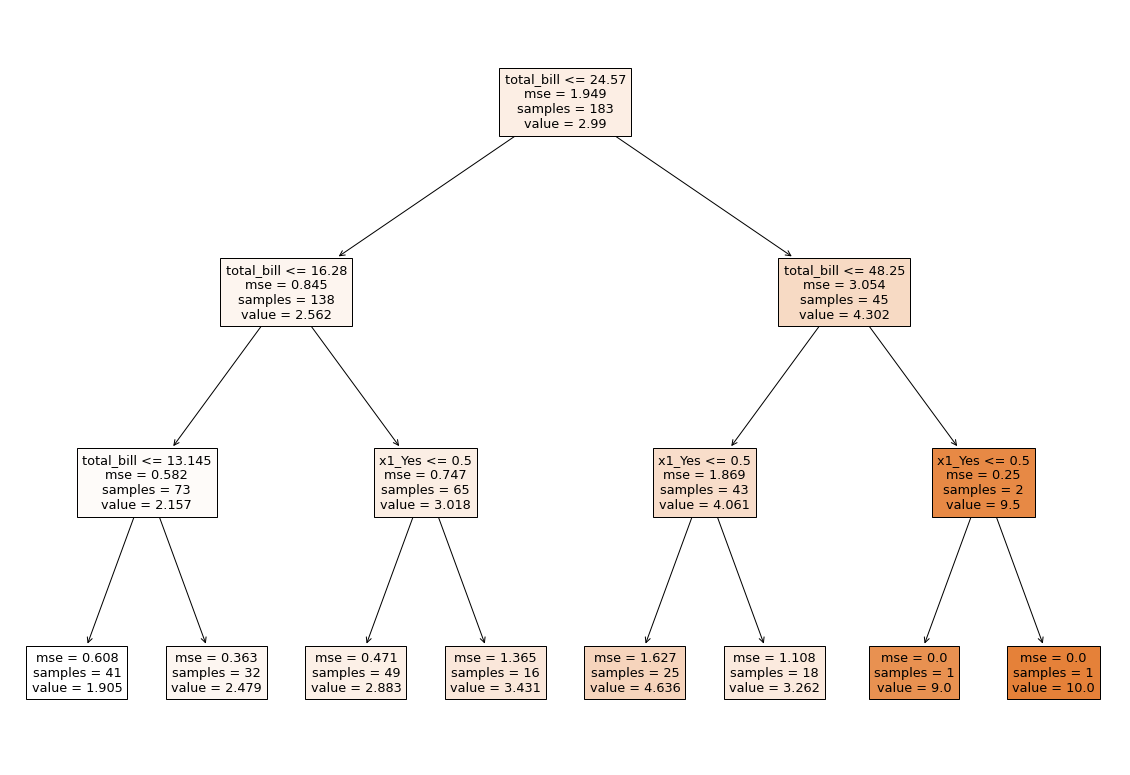

In [95]:
plt.figure(figsize=(20,14))
plot_tree(dtr, feature_names = new_features, filled=True)
plt.show()

## __Outlier__

This time, we will illustrate about outlier (global outlier, contextual outlier and collective outlier) and its effect in the modeling especially linear regression.

In [96]:
x = list(np.random.uniform(155,165,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


In [97]:
df_association = pd.DataFrame({
    'x': x,
    'y': y,
    'y_real': y_real
})

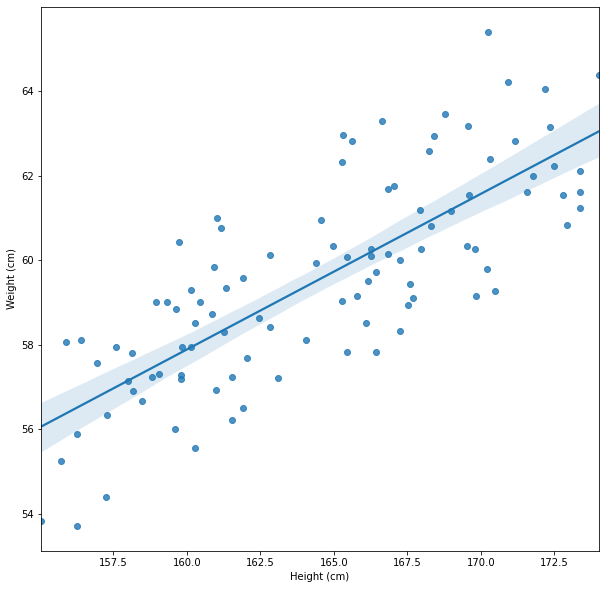

In [113]:
plt.figure(figsize=(10,10))
sns.regplot(x='x', y='y', data=df_association)
# sns.lineplot(x='x', y='y_real', data=df_association)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (cm)')
plt.show()

Scatter Plot of two variable without outlier

> ## Global Outlier

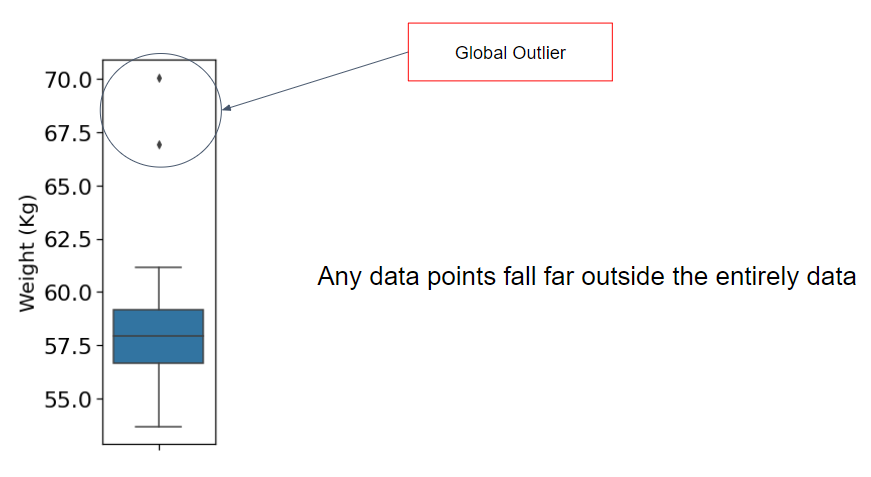

In [106]:
from sklearn.linear_model import LinearRegression

In [101]:
x = [191,190]
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_outlier = df_association.append(df_add)

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


In [102]:
df_association_outlier

,x,y,y_real
0,157.59,57.40,57.16
1,159.48,56.34,57.82
2,157.50,55.67,57.12
3,164.58,61.44,59.60
4,161.09,59.33,58.38
...,...,...,...
97,159.22,60.42,57.73
98,158.10,58.68,57.33
99,160.42,60.36,58.15
0,191.00,68.02,68.85


Text(0, 0.5, 'Weight (Kg)')

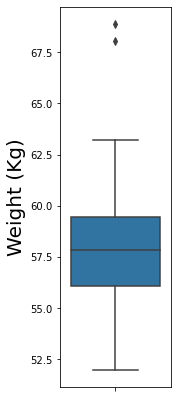

In [104]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_association_outlier['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

Global outlier for height

Text(0.5, 0, 'Height (cm)')

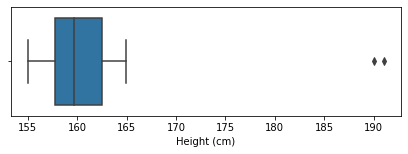

In [105]:
plt.figure(figsize=(7,2))
sns.boxplot(x=df_association_outlier['x'])
plt.xlabel('Height (cm)')

> ## Contextual Outlier

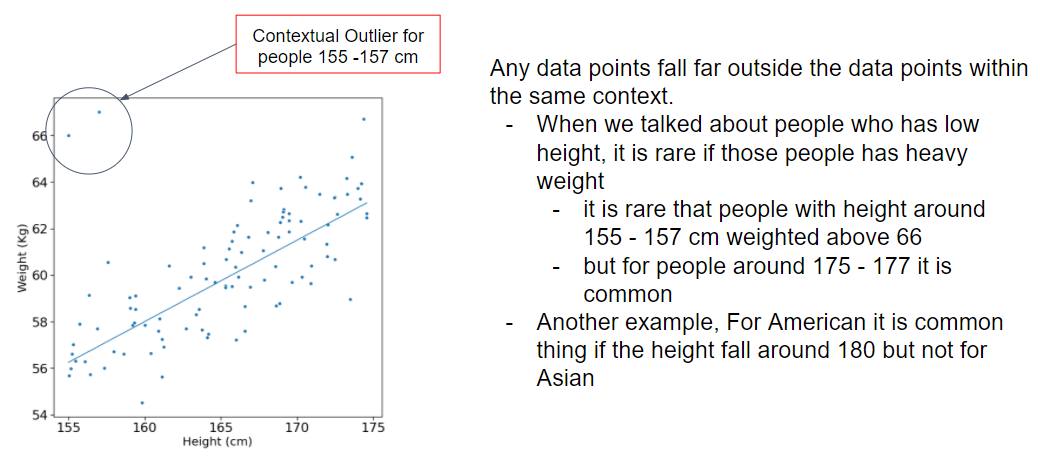

In [107]:
x = list(np.random.uniform(155,175,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


In [108]:
df_association = pd.DataFrame({'x': x, 'y': y, 'y_real': y_real})

In [110]:
x = [155,157]

y = [66,67]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_contextual = df_association.append(df_add)

Text(0, 0.5, 'Weight (Kg)')

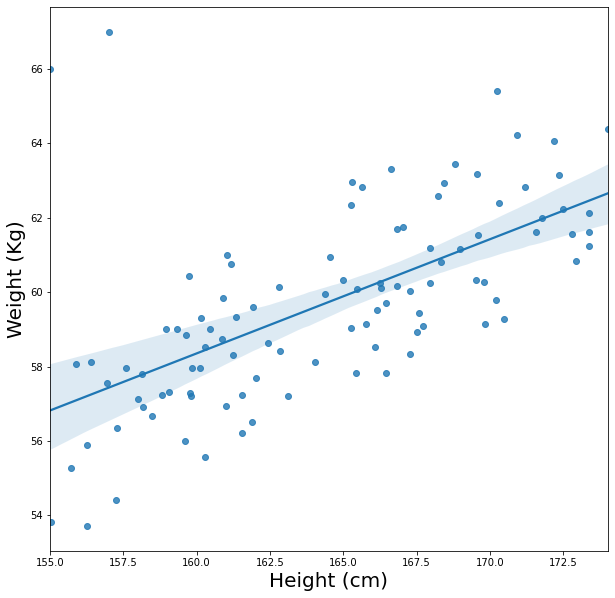

In [112]:
plt.figure(figsize=(10,10))
sns.regplot(x='x', y='y', data=df_association_contextual)
# sns.lineplot(x='x', y='y_real', data=df_association_contextual)
plt.xlabel('Height (cm)', fontsize=20)
plt.ylabel('Weight (Kg)', fontsize=20)

> ## Influential Observation

In [115]:
x = [170, 171, 173, 180]

y = [91, 95, 95, 100]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_influenced = df_association.append(df_add)

Text(0, 0.5, 'Weight (kg)')

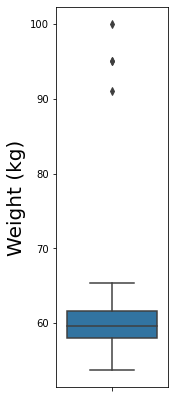

In [116]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_association_influenced['y'])
plt.ylabel('Weight (kg)', fontsize = 20)

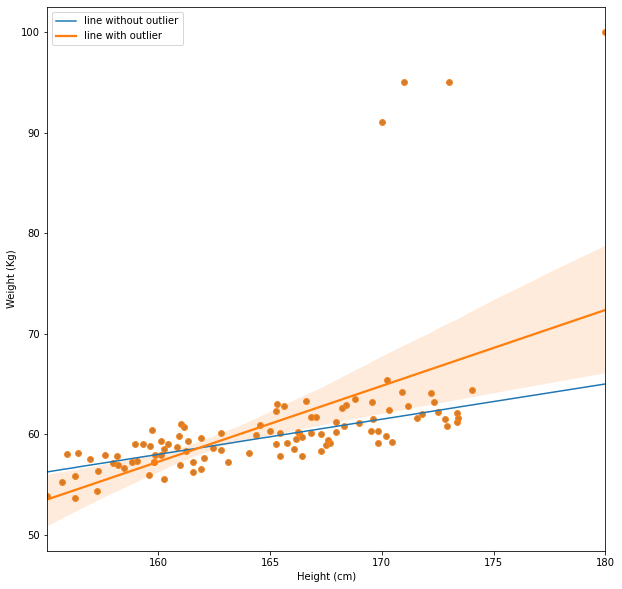

In [117]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='x', y='y', data=df_association_influenced)
sns.lineplot(x='x', y='y_real', data=df_association_influenced)
sns.regplot(x='x', y='y', data = df_association_influenced)
plt.legend(['line without outlier', 'line with outlier'], loc = 'upper left')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (Kg)')
plt.show()

## __Binning__

There is some many kind of relationship exists. Binning can help us capture any type of relationship in the modeling. We will give an illustration about example of binning method and performance improvement using binning.

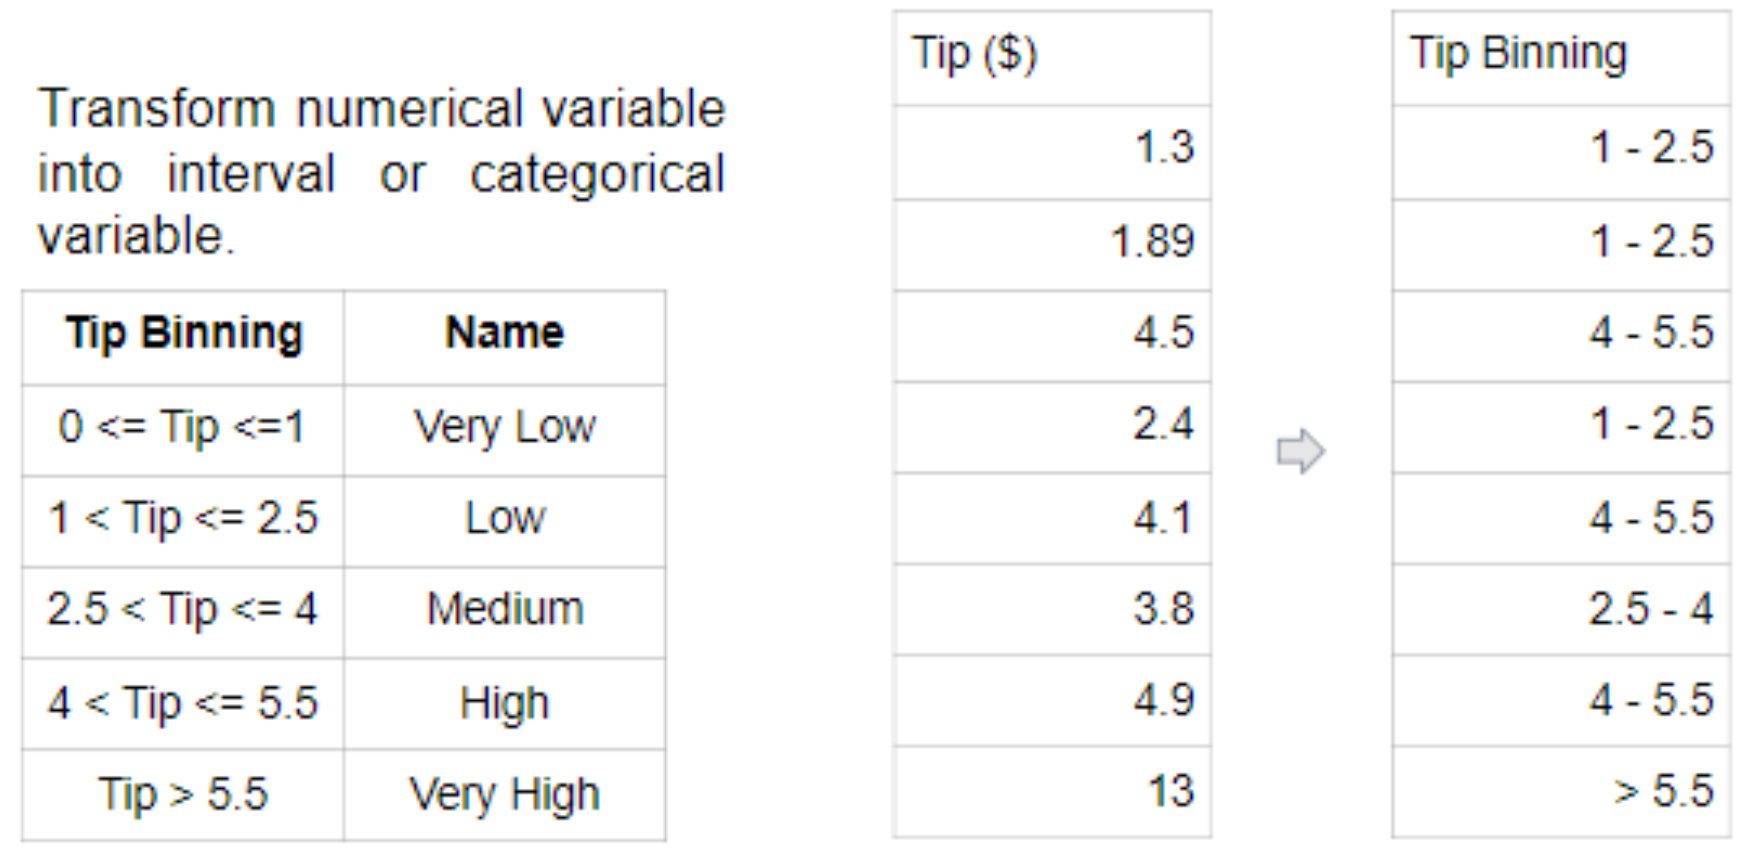

In [118]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


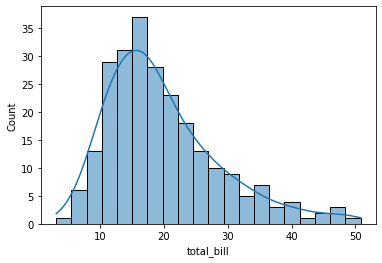

In [119]:
sns.histplot(tips['total_bill'], bins=20, kde=True)
plt.show()

In [120]:
tips2 = tips.copy()
tips2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [122]:
tips2['total_bill_eqfreq'] = pd.qcut(tips2['total_bill'], 5)
tips2['total_bill_eqfreq_encoded'] = pd.qcut(tips2['total_bill'], 5, labels = range(1,6))

In [123]:
tips2['total_bill_eqintv'] = pd.cut(tips2['total_bill'], 5)
tips2['total_bill_eqintv_encoded'] = pd.cut(tips2['total_bill'], 5, labels = range(1,6))

In [125]:
tips2['total_bill total_bill_eqfreq total_bill_eqintv total_bill_eqfreq_encoded total_bill_eqintv_encoded'.split()]

,total_bill,total_bill_eqfreq,total_bill_eqintv,total_bill_eqfreq_encoded,total_bill_eqintv_encoded
0,16.99,"(16.222, 19.818]","(12.618, 22.166]",3,2
1,10.34,"(3.069, 12.636]","(3.022, 12.618]",1,1
2,21.01,"(19.818, 26.098]","(12.618, 22.166]",4,2
3,23.68,"(19.818, 26.098]","(22.166, 31.714]",4,3
4,24.59,"(19.818, 26.098]","(22.166, 31.714]",4,3
...,...,...,...,...,...
239,29.03,"(26.098, 50.81]","(22.166, 31.714]",5,3
240,27.18,"(26.098, 50.81]","(22.166, 31.714]",5,3
241,22.67,"(19.818, 26.098]","(22.166, 31.714]",4,3
242,17.82,"(16.222, 19.818]","(12.618, 22.166]",3,2


> ## Equal Frequencies : Quantile

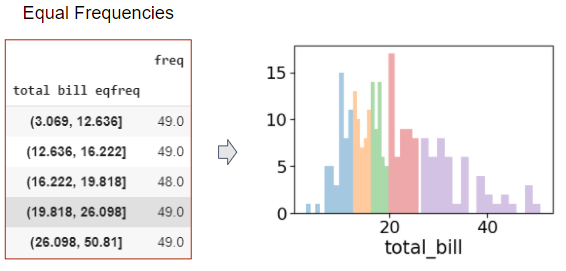

In [126]:
eqfreq = tips2.pivot_table(
    index ='total_bill_eqfreq',
    aggfunc = len,
    values = 'tip'
)
eqfreq.columns = ['freq']
eqfreq

,freq
total_bill_eqfreq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


> ## Equal Interval

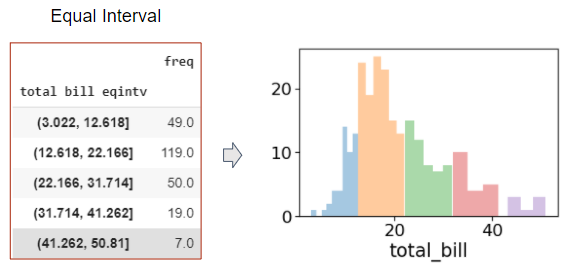

In [127]:
eqintv = tips2.pivot_table(
    index = 'total_bill_eqintv',
    aggfunc = len,
    values = 'tip'
)
eqintv.columns = ['freq']
eqintv

,freq
total_bill_eqintv,
"(3.022, 12.618]",49.0
"(12.618, 22.166]",119.0
"(22.166, 31.714]",50.0
"(31.714, 41.262]",19.0
"(41.262, 50.81]",7.0


C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


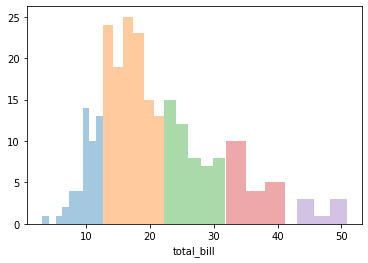

In [129]:
for i in range(1,6):
    sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == i]['total_bill'], kde=False)

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

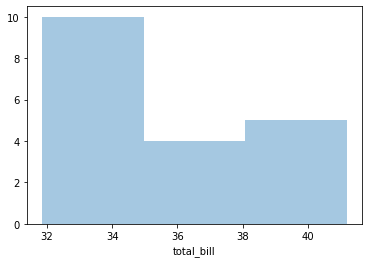

In [151]:
sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill'], kde=False)

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

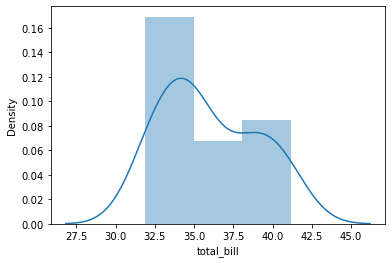

In [156]:
sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill'], kde=True)

In [155]:
tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill_eqintv total_bill total_bill_eqintv_encoded'.split()][tips2['total_bill'].between(31.6, 35)]

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,total_bill_eqintv,total_bill,total_bill_eqintv_encoded
47,"(31.714, 41.262]",32.40,4
52,"(31.714, 41.262]",34.81,4
83,"(31.714, 41.262]",32.68,4
85,"(31.714, 41.262]",34.83,4
141,"(31.714, 41.262]",34.30,4
173,"(31.714, 41.262]",31.85,4
175,"(31.714, 41.262]",32.90,4
179,"(31.714, 41.262]",34.63,4
180,"(31.714, 41.262]",34.65,4
237,"(31.714, 41.262]",32.83,4


> ## Binning Effect on Modeling

Now, we want to illustrate how binning can improve model performance. First, we want to do some data exploreation and then go ahead into the modeling process.

In [130]:
from sklearn.preprocessing import KBinsDiscretizer

In [131]:
disk = pd.read_csv('disk.csv')

In [132]:
disk.head()

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1


In [134]:
disk['class'].value_counts(normalize=True)

1    0.51864
0    0.48136
Name: class, dtype: float64

In [135]:
disk['x_eqintv'] = pd.cut(disk['x'], 7)
disk['x_eqintv_encoded'] = pd.cut(disk['x'], 7, labels = range(1,8))

In [136]:
disk.head()

,x,class,x_eqintv,x_eqintv_encoded
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7


In [145]:
len(disk) # banyaknya data / sample

1529

In [150]:
pd.crosstab(disk['x_eqintv'], disk['class'], normalize=1)

class,0,1
x_eqintv,,
"(17.951, 25.0]",0.069293,0.221942
"(25.0, 32.0]",0.157609,0.126103
"(32.0, 39.0]",0.248641,0.045397
"(39.0, 46.0]",0.217391,0.036570
"(46.0, 53.0]",0.194293,0.128625
"(53.0, 60.0]",0.093750,0.200504
"(60.0, 67.0]",0.019022,0.240858
